##  K - means en utilisant time warping

In [1]:
import matplotlib as plt
import matplotlib.pyplot as plt

#mesure de similarité dtw entre deux séries temporelles. x = un pixel sur un intervalle de temps
def dtw(x, x_prime):
  R=np.zeros((len(x),len(x_prime)))
  for i in range(len(x)):
    for j in range(len(x_prime)):
      R[i, j] = distance.euclidean(x[i], x_prime[j]) ** 2
      if i > 0 or j > 0:
        R[i, j] += min(
          R[i-1, j  ] if i > 0             else math.inf,
          R[i  , j-1] if j > 0             else math.inf,
          R[i-1, j-1] if (i > 0 and j > 0) else math.inf
        )

  return R[-1, -1] ** (1/2)

In [2]:
def dtw_matrice(x,centroides):
    distances = np.zeros((len(x), len(centroides)))
    index_i = 0
    index_j = 0     
    for i in x:
        for j in centroides:
            distances[index_i,index_j] = dtw(i.reshape(-1,1),j.reshape(-1,1))
            index_j += 1
        index_i +=1
        index_j = 0
    return distances

In [3]:
#génération des matrices : 
data=np.random.rand(5,1)
sequence1 = np.random.rand(5,1)
sequence2 = np.random.rand(5,1)
sequence3 = np.random.rand(5,1)
sequence4= np.random.rand(5,1)

print(dtw(sequence1,sequence2))
print(sequence1)

0.7278287302899196
[[0.30452499]
 [0.32301172]
 [0.06428158]
 [0.67339974]
 [0.90245915]]


In [4]:
# Regrouper les séquences dans une liste
#data = [sequence1, sequence2, sequence3, sequence4]
data = [[2,10,5,4,3,2], [7,11,5,3,1,7], [1,10,5,0,1,2], [10,9,8,7,6,1]]
data=np.array(data)
print(data.shape)
print(data)

(4, 6)
[[ 2 10  5  4  3  2]
 [ 7 11  5  3  1  7]
 [ 1 10  5  0  1  2]
 [10  9  8  7  6  1]]


In [5]:
#Importing required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    
    #finding the distance between centroids and all the data points
    distances = dtw_matrice(x, centroids) #Step 2
    
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points

# Trying the algo over some selected pixels

### Creation of the data_set

In [8]:
from selection_pixels_dtw import *
import os
import cv2
from PIL import Image
import rasterio as rio
import re

In [9]:
# List of target pixels
pixels_de_interet = pix_danone + pix_agri + pix_ensta + pix_apt + pix_lac + pix_foret
len(pixels_de_interet)

54

In [10]:
# dir = "../../ressources/images"
# images_list = os.listdir(dir)
# with rio.open(dir+'/crop_SENTINEL2A_20151226-111142-750_L2A_T31UDQ_D_V1-1.tif', 'r') as ds:
#     band3 = ds.read(3)
# print(band3.shape)
# lista = list()
# for pixel in pixels_de_interet:
#     lista.append(band3[pixel[0], pixel[1]])
# print(len(lista))

### On divise les images Sentinel 2A et 2B et on les mets en ordre cronologique

In [11]:
dir = "../../ressources/images"
images_list = os.listdir(dir)

images_2A = list()
images_2B = list()
prog = re.compile(r'\w+2A')
for image in images_list:
    if prog.match(image):
        images_2A.append(image)
    else:
        images_2B.append(image)
        
images_2A.sort()
images_2B.sort()        

In [12]:
list_to_use = images_2A
line = 0
matrice = np.zeros((len(pixels_de_interet), len(list_to_use)))
for image in list_to_use:
    with rio.open(dir+'/'+image, 'r') as ds:
        # arr = ds.read()
        # band1 = raster.read(1)
        # band2 = raster.read(2)
        band3 = ds.read(3)
        # band4 = raster.read(4)
    # Extraction of target pixels
    for pixel,j in zip(pixels_de_interet, range(len(pixels_de_interet)-1)):
        pass
        matrice[j,line] = band3[pixel[0], pixel[1]]
    line +=1     
        

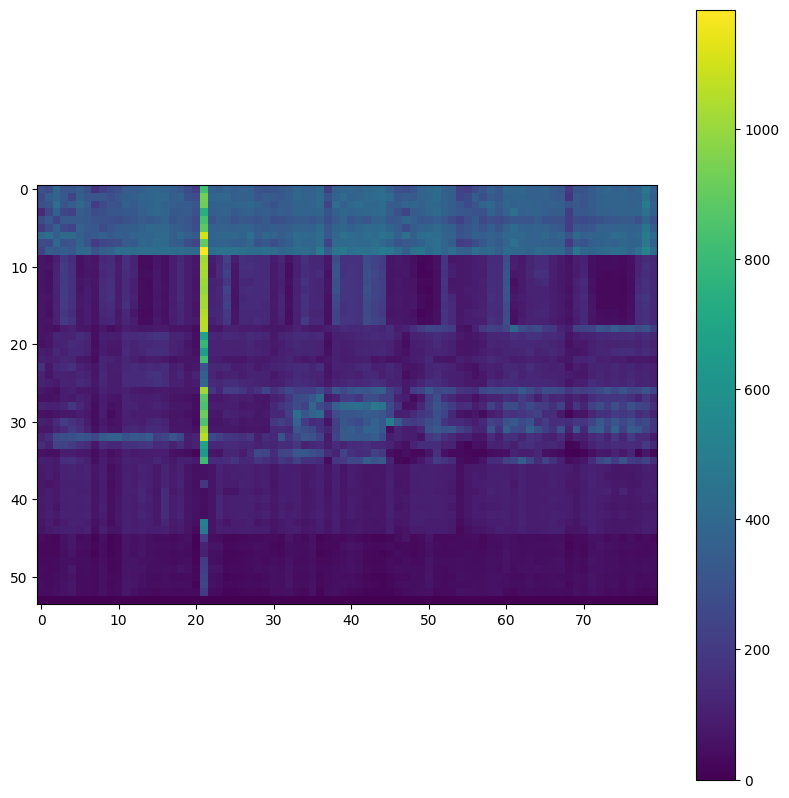

In [13]:
#Looking for a pixels
img = (matrice/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.colorbar()
plt.show()


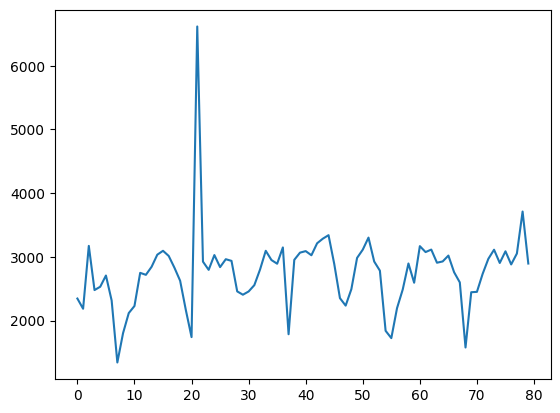

In [14]:
# L'image x est bizarre
plt.plot(matrice[0])

In [15]:
chelou = np.argmax(matrice[0])
chelou

21

In [16]:
matrice = np.delete(matrice,chelou,1)

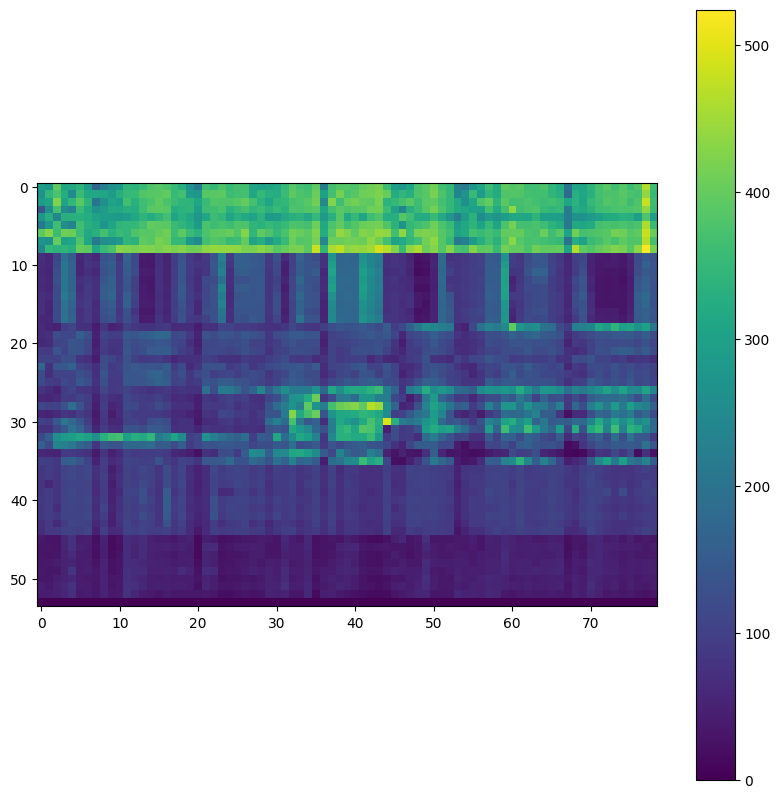

In [17]:
#Looking for a pixels
img = (matrice/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.colorbar()
plt.show()


In [18]:
yhat = kmeans(matrice,6,1000)

In [19]:
len(pix_ensta)

9

In [20]:
print(len(yhat))
yhat

54


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 3, 3,
       3, 3, 3, 3, 5, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## A simple function to show the obtained results

In [21]:
import collections
def affichage(yhat,pix_interet):
    name = ''
    dico = collections.Counter(yhat)
    for key in list(dico.keys()):
        dico[key] = [f'number of vectors = {dico[key]}'] 
        for index,pos in zip(yhat,range(len(yhat))):
            if index == key:
                if 0<=pos<=8: name = 'pix_danone'
                elif 9<=pos<=17: name = 'pix_agri'
                elif 18<=pos<=26: name = 'pix_ensta'
                elif 27<=pos<=35: name = 'pix_apt'
                elif 36<=pos<=44: name = 'pix_lac'
                elif 45<=pos<=53: name = 'pix_foret'

                dico[key].append(f'{pix_interet[pos]}:{name}')

    for key in dico:
        print(f'cluster numero {key}:\n-------------------------------')
        for part in dico[key]:
            print(f'{part}')
        print('-------------------------------')



In [22]:
affichage(yhat,pixels_de_interet)

cluster numero 0:
-------------------------------
number of vectors = 9
[383, 497]:pix_danone
[383, 500]:pix_danone
[387, 501]:pix_danone
[383, 504]:pix_danone
[387, 505]:pix_danone
[384, 508]:pix_danone
[388, 509]:pix_danone
[384, 504]:pix_danone
[386, 504]:pix_danone
-------------------------------
cluster numero 4:
-------------------------------
number of vectors = 9
[318, 438]:pix_agri
[322, 435]:pix_agri
[324, 433]:pix_agri
[329, 429]:pix_agri
[333, 426]:pix_agri
[337, 424]:pix_agri
[339, 422]:pix_agri
[344, 418]:pix_agri
[350, 414]:pix_agri
-------------------------------
cluster numero 2:
-------------------------------
number of vectors = 8
[447, 618]:pix_ensta
[405, 448]:pix_apt
[408, 444]:pix_apt
[412, 446]:pix_apt
[412, 463]:pix_apt
[407, 465]:pix_apt
[405, 455]:pix_apt
[401, 446]:pix_apt
-------------------------------
cluster numero 3:
-------------------------------
number of vectors = 18
[454, 627]:pix_ensta
[454, 631]:pix_ensta
[457, 632]:pix_ensta
[459, 625]:pix_ensta